<a href="https://colab.research.google.com/github/ladrianx/proyectos/blob/main/arma_garch_stf_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa en *R* para ajustar modelos ARMA y GARCH

## Importamos librerías necesarias

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R

if (!require(quantmod)) {
  install.packages("quantmod")  # Obtener datos financieros
}
if (!require(forecast)) {
  install.packages("forecast")  # Análisis de series temporales
}
if (!require(rugarch)) {
  install.packages("rugarch")  # Modelos GARCH
}
if (!require(tseries)) {
  install.packages("tseries")  # Análisis de series temporales y pruebas estadísticas
}
if (!require(TSA)) {
  install.packages("TSA")  # Análisis de series temporales y herramientas adicionales
}
if (!require(TTR)) {
  install.packages("TTR")  # Indicadores técnicos y funciones de trading
}
if (!require(missForest)) {
  install.packages("missForest")  # Para imputar datos faltantes
}

## Cargar las librerías y suprimir mensajes de inicio

In [ ]:
%%R

suppressPackageStartupMessages({
  suppressWarnings({
    library(forecast)
    library(rugarch)
    library(TTR)
    library(TSA)
    library(tseries)
    library(quantmod)
    library(missForest)
  })
})

## Definir periodo de tiempo y lista de acciones

In [ ]:
%%R

# Periodo de tiempo definido
inicio <- as.Date('2024-01-01')  # Fecha de inicio
fin <- as.Date('2024-12-22') #Sys.Date()      # Fecha de fin

# Definir la lista de acciones
acciones <- list(
  c('GMEXICOB.MX', 'Grupo México'),
  #c('BIMBOA.MX', 'Grupo Bimbo'),
  c('AMX', 'América Móvil'),
  #c('TLEVISACPO.MX', 'Televisa'),
  #c('CEMEXCPO.MX', 'Cemex'),
  #c('ALFAA.MX', 'Grupo Alfa'),
  #c('GFNORTEO.MX', 'Grupo Banorte'),
  #c('SAN.MX', 'Santander México'),
  c('FEMSAUBD.MX', 'Femsa'),
  #c('AC.MX', 'Arca Continental'),
  #c('GAPB.MX', 'GA del Pacífico'),
  #c('OMAB.MX', 'GA del Centro Norte'),
  #c('ALSEA.MX', 'Alsea'),
  #c('PE&OLES.MX', 'Peñoles'),
  c('^MXX', 'IPC'),
  c('MXN=X', 'FXUSD')#,
  #c('FTBIVA.FGI', 'FTSE BIVA'),
  #c('INMEX.MX', 'SPBMV INMEX'),
  #c('IPCCOMPMX.MX', 'SPBMV IPC'),
  #c('CNY=X', 'FXCNY')#,
  #c('NVDA', 'NVIDIA Corporation'),
  #c('GC=F', 'GOLD 24DC'),
  #c('CL=F', 'CRUDE OIL 24DC')
)

## Definir la función para crear los gráficos

In [ ]:
%%R

graficar_datos_ar1_base <- function(datos_return, nombre) {
  # Configurar layout para los gráficos
  par(mfrow = c(2, 2))  # 3x2 grid para las gráficas

  # Asegurarse de que los datos son numéricos
  datos_return <- as.numeric(datos_return)

  # 1. Gráfico de la serie de tiempo
  plot(datos_return, col = "blue", type = "l",
       main = paste("Serie de tiempo de", nombre),
       xlab = "Tiempo", ylab = "Retorno")

  # 2. QQ-Plot para evaluar la normalidad de los datos originales
  qqnorm(datos_return, col ="blue", main = paste("QQ-Plot de", nombre))
  qqline(datos_return, col = "red")

  # 3. ACF (Función de autocorrelación) de los datos originales
  acf(datos_return, main = paste("ACF de", nombre))

  # 4. PACF (Función de autocorrelación parcial) de los datos originales
  pacf(datos_return, main = paste("PACF de", nombre))

  # Ajustar un modelo AR(1) para obtener los residuos
  #modelo_ar1 <- arima(datos_return, order = c(1, 0, 0))
  #residuos <- residuals(modelo_ar1)

  # 5. ACF de los residuos
  #acf(residuos, main = paste("ACF-residuos de", nombre))

  # 6. QQ-Plot de los residuos para evaluar normalidad
  #qqnorm(residuos, main = paste("QQ-Plot residuos de", nombre))
  #qqline(residuos, col = "red")
}

## Descargar los datos y generar los gráficos para cada acción

Error al descargar o procesar datos para: IPC - Saltando este ticker.


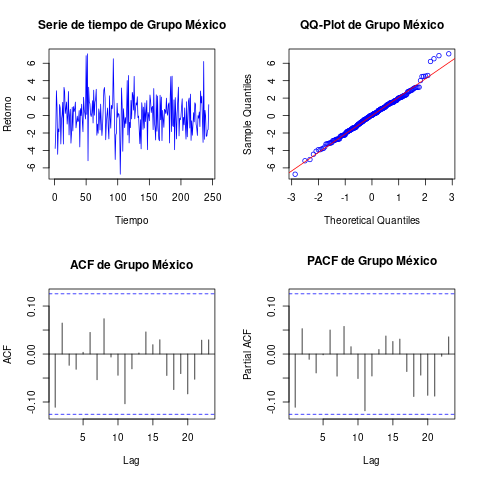

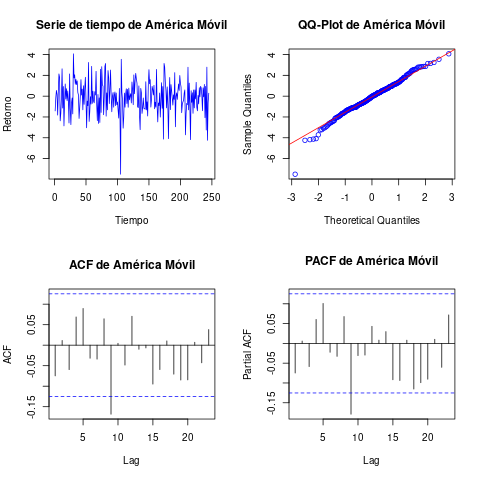

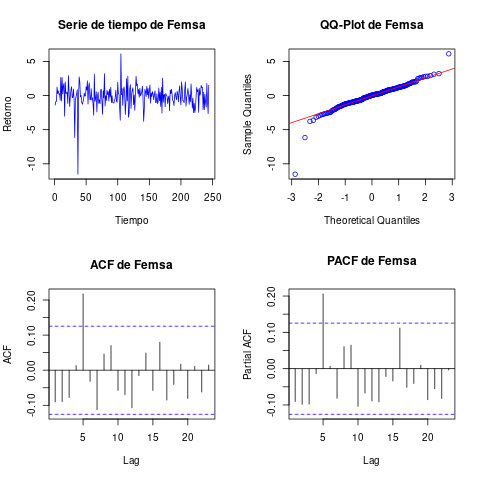

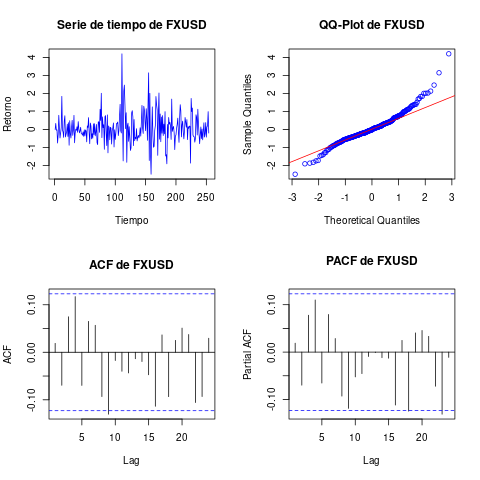

In [ ]:
%%R
# Suponiendo que la función graficar_datos_ar1_base está definida
for (accion in acciones) {
  ticker <- accion[1]
  nombre <- accion[2]

  # Descargar los datos
  tryCatch({
    getSymbols(ticker, from = inicio, to = fin, src = "yahoo", auto.assign = TRUE)
    data <- get(ticker)

    # Calcular retornos logarítmicos
    data$return <- 100*diff(log(Cl(data)))  # Cl(data) extrae los precios de cierre
    returns <- na.omit(data$return)

    # Llamar a la función para generar las gráficas de cada conjunto de datos
    graficar_datos_ar1_base(returns, nombre)

  }, error = function(e) {
    cat("Error al descargar o procesar datos para:", nombre, "- Saltando este ticker.\n")
  })

  # Restablecer el layout de gráficos después de cada acción
  par(mfrow = c(1, 1))
}


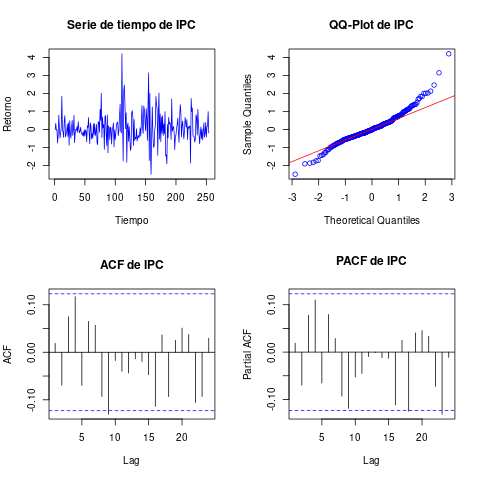

acf,[RTYPES.REALSXP]
type,[RTYPES.STRSXP]
n.used,[RTYPES.INTSXP]
lag,[RTYPES.REALSXP]
series,[RTYPES.STRSXP]
snames,[RTYPES.NILSXP]


In [ ]:
%R graficar_datos_ar1_base(returns, "IPC")
#%R graficar_datos_ar1_base(returns, "FTSE BIVA")
#%R graficar_datos_ar1_base(returns, "SPBMV INMEX")
#%R graficar_datos_ar1_base(returns, "SPBMV IPC")

## Pruebas de estacionariedad

In [ ]:
%%R

# Inicializar lista para almacenar resultados
resultados_pruebas <- data.frame()

# Descargar los datos y calcular los retornos
for (accion in acciones) {
  ticker <- accion[1]
  nombre <- accion[2]

  # Descargar datos con manejo de errores
  tryCatch({
    df <- getSymbols(ticker, from = inicio, to = fin, src = "yahoo", auto.assign = FALSE)

    # Calcular los retornos logarítmicos
    df$return <- 100*diff(log(Cl(df)))  # Cl(df) extrae los precios de cierre
    serie_retorno <- na.omit(df$return)

    # Prueba de Dickey-Fuller
    adf_test <- adf.test(serie_retorno)
    adf_pvalue <- adf_test$p.value

    # Prueba KPSS
    kpss_test <- kpss.test(serie_retorno)
    kpss_pvalue <- kpss_test$p.value

    # Prueba de Box-Ljung
    box_ljung_test <- Box.test(serie_retorno, lag = 30, type = "Ljung-Box")
    box_ljung_pvalue <- box_ljung_test$p.value

    # Almacenar resultados
    resultados_pruebas <- rbind(resultados_pruebas, data.frame(
      Accion = nombre,
      ADF_P_Value = adf_pvalue,
      KPSS_P_Value = kpss_pvalue,
      Box_Ljung_P_Value = box_ljung_pvalue,
      Estacionario_ADF = ifelse(adf_pvalue > 0.05, "No estacionario", "Estacionario"),
      Estacionario_KPSS = ifelse(kpss_pvalue < 0.05, "No estacionario", "Estacionario"),
      Independencia_Box_Ljung = ifelse(box_ljung_pvalue < 0.05, "No independiente", "Independiente")
    ))

  }, error = function(e) {
    cat("Error al descargar o procesar datos para:", nombre, "\n")
  })
}

# Mostrar los resultados de las pruebas de estacionariedad
print(resultados_pruebas)

         Accion ADF_P_Value KPSS_P_Value Box_Ljung_P_Value Estacionario_ADF
1  Grupo México        0.01          0.1        0.73366508     Estacionario
2 América Móvil        0.01          0.1        0.46437721     Estacionario
3         Femsa        0.01          0.1        0.08910539     Estacionario
4           IPC        0.01          0.1        0.75936711     Estacionario
5         FXUSD        0.01          0.1        0.12699820     Estacionario
  Estacionario_KPSS Independencia_Box_Ljung
1      Estacionario           Independiente
2      Estacionario           Independiente
3      Estacionario           Independiente
4      Estacionario           Independiente
5      Estacionario           Independiente


In [ ]:
%R -o resultados_pruebas
resultados_pruebas

,Accion,ADF_P_Value,KPSS_P_Value,Box_Ljung_P_Value,Estacionario_ADF,Estacionario_KPSS,Independencia_Box_Ljung
1,Grupo México,0.01,0.1,0.733665,Estacionario,Estacionario,Independiente
2,América Móvil,0.01,0.1,0.464377,Estacionario,Estacionario,Independiente
3,Femsa,0.01,0.1,0.089105,Estacionario,Estacionario,Independiente
4,IPC,0.01,0.1,0.759367,Estacionario,Estacionario,Independiente
5,FXUSD,0.01,0.1,0.126998,Estacionario,Estacionario,Independiente


## Función para ajustar los modelos ARMA y GARCH

In [ ]:
%%R
# Librerías necesarias
library(quantmod)
library(forecast)
library(rugarch)

# Función para ajustar los modelos ARMA y GARCH
ajustar_modelos_series_tiempo <- function(serie_entrenamiento, valor_real) {
  # Modelo ARMA
  modelo_arma <- tryCatch({
    auto.arima(serie_entrenamiento, max.d = 0, seasonal = FALSE)
  }, error = function(e) {
    message("Error ajustando modelo ARMA: ", e)
    return(NULL)
  })

  if (!is.null(modelo_arma)) {
    prediccion_arma <- forecast(modelo_arma, h = 1)$mean
    error_arma <- valor_real - prediccion_arma
    cat("Mejores valores para ARMA para acción:", nombre, "\n")
    cat("p:", modelo_arma$arma[1], "d:", 0, "q:", modelo_arma$arma[3], "\n")
  } else {
    prediccion_arma <- NA
    error_arma <- NA
  }

  # Modelo GARCH
  spec <- ugarchspec(mean.model = list(armaOrder = c(1, 1)), variance.model = list(model = "sGARCH"))
  modelo_garch <- tryCatch({
    ugarchfit(spec = spec, data = serie_entrenamiento)
  }, error = function(e) {
    message("Error ajustando modelo GARCH: ", e)
    return(NULL)
  })

  if (!is.null(modelo_garch)) {
    prediccion_garch <- fitted(ugarchforecast(modelo_garch, n.ahead = 1))
    error_garch <- valor_real - prediccion_garch
  }

  # Retornar los resultados
  return(list(
    ARMA = list(prediccion = prediccion_arma, error = error_arma),
    GARCH = list(prediccion = prediccion_garch, error = error_garch)
  ))
}

## Resultados

In [ ]:
%%R

# Resultado de los modelos
resultados_modelos <- list()
tabla_resultados <- data.frame()

# Ajustar los modelos para cada acción
for (accion in acciones) {
  ticker <- accion[1]
  nombre <- accion[2]

  # Descargar datos con manejo de errores y supresión de advertencias
  tryCatch({
    suppressWarnings({
      df <- getSymbols(ticker, from = inicio, to = fin, src = "yahoo", auto.assign = FALSE)
    })

    # Verificar que los datos han sido descargados correctamente
    if (is.null(df) || nrow(df) == 0) {
      cat("No se pudieron descargar datos para:", nombre, "- Saltando este ticker.\n")
      next
    }

    # Calcular los retornos logarítmicos
    df$return <- 100 * diff(log(Cl(df)))  # Cl(df) extrae los precios de cierre

    # Verificar si hay datos suficientes para calcular los retornos
    if (length(df$return) > 1) {
      serie_retorno <- na.omit(df$return)
      serie_entrenamiento <- head(serie_retorno, -1)
      valor_real <- tail(serie_retorno, 1)  # Último valor real de retorno

      # Ajustar modelos y obtener resultados
      cat("\nAjustando modelos para:", nombre, "\n")
      modelos_ajustados <- ajustar_modelos_series_tiempo(serie_entrenamiento, valor_real)

      # Crear una tabla de resultados para cada modelo
      for (modelo in c("ARMA", "GARCH")) {
        tabla_accion <- data.frame(
          Accion = nombre,
          Modelo = modelo,
          Retorno_Real = as.numeric(valor_real),
          Prediccion = as.numeric(modelos_ajustados[[modelo]]$prediccion),
          Error = as.numeric(modelos_ajustados[[modelo]]$error),
          MSE = as.numeric(modelos_ajustados[[modelo]]$error)^2,
          RMSE = sqrt(as.numeric(modelos_ajustados[[modelo]]$error)^2)
        )

        # Añadir la tabla de cada modelo a la tabla global de resultados
        tabla_resultados <- rbind(tabla_resultados, tabla_accion)
      }
    } else {
      cat("No hay suficientes datos para calcular retornos para:", nombre, "\n")
    }

  }, error = function(e) {
    cat("\nError al descargar o procesar datos para:", nombre, "- Saltando este ticker.\n")
  })
}

# Resetear el índice de la tabla final para que sea continuo y limpio
row.names(tabla_resultados) <- NULL

# Mostrar la tabla de resultados final
#print(tabla_resultados)


Ajustando modelos para: Grupo México 
Mejores valores para ARMA para acción: Grupo México 
p: 1 d: 0 q: 0 

Ajustando modelos para: América Móvil 
Mejores valores para ARMA para acción: América Móvil 
p: 0 d: 0 q: 0 

Ajustando modelos para: Femsa 
Mejores valores para ARMA para acción: Femsa 
p: 0 d: 0 q: 0 

Ajustando modelos para: IPC 
Mejores valores para ARMA para acción: IPC 
p: 2 d: 0 q: 0 

Ajustando modelos para: FXUSD 
Mejores valores para ARMA para acción: FXUSD 
p: 0 d: 0 q: 0 


In [ ]:
%R -o tabla_resultados
tabla_resultados

,Accion,Modelo,Retorno_Real,Prediccion,Error,MSE,RMSE
1,Grupo México,ARMA,1.249441,0.176931,1.072509,1.150276,1.072509
2,Grupo México,GARCH,1.249441,0.151761,1.097679,1.204900,1.097679
3,América Móvil,ARMA,0.281096,0.000000,0.281096,0.079015,0.281096
4,América Móvil,GARCH,0.281096,-0.566362,0.847458,0.718186,0.847458
5,Femsa,ARMA,1.493725,0.000000,1.493725,2.231214,1.493725
6,Femsa,GARCH,1.493725,0.352667,1.141058,1.302014,1.141058
7,IPC,ARMA,0.671269,0.168017,0.503252,0.253263,0.503252
8,IPC,GARCH,0.671269,0.097306,0.573963,0.329434,0.573963
9,FXUSD,ARMA,-0.199962,0.000000,-0.199962,0.039985,0.199962
10,FXUSD,GARCH,-0.199962,0.027959,-0.227921,0.051948,0.227921


In [ ]:
%%R
# Librerías necesarias
library(quantmod)
library(forecast)
library(rugarch)

# Función para ajustar los modelos ARMA y GARCH y mostrar los coeficientes
ajustar_modelos_series_tiempo <- function(serie_entrenamiento) {
  # Modelo ARMA
  modelo_arma <- tryCatch({
    auto.arima(serie_entrenamiento, max.d = 0, seasonal = FALSE)
  }, error = function(e) {
    message("Error ajustando modelo ARMA: ", e)
    return(NULL)
  })

  if (!is.null(modelo_arma)) {
    cat("\nCoeficientes del modelo ARMA:\n")
    print(modelo_arma$coef)
  } else {
    cat("\nError en el ajuste del modelo ARMA\n")
  }

  # Modelo GARCH
  spec <- ugarchspec(mean.model = list(armaOrder = c(1, 1)), variance.model = list(model = "sGARCH"))
  modelo_garch <- tryCatch({
    ugarchfit(spec = spec, data = serie_entrenamiento)
  }, error = function(e) {
    message("Error ajustando modelo GARCH: ", e)
    return(NULL)
  })

  if (!is.null(modelo_garch)) {
    cat("\nCoeficientes del modelo GARCH:\n")
    print(coef(modelo_garch))
  } else {
    cat("\nError en el ajuste del modelo GARCH\n")
  }
}

# Ajustar los modelos para cada acción
for (accion in acciones) {
  ticker <- accion[1]
  nombre <- accion[2]

  # Descargar datos con manejo de errores y supresión de advertencias
  tryCatch({
    suppressWarnings({
      df <- getSymbols(ticker, from = inicio, to = fin, src = "yahoo", auto.assign = FALSE)
    })

    # Verificar que los datos han sido descargados correctamente
    if (is.null(df) || nrow(df) == 0) {
      cat("No se pudieron descargar datos para:", nombre, "- Saltando este ticker.\n")
      next
    }

    # Calcular los retornos logarítmicos
    df$return <- 100 * diff(log(Cl(df)))  # Cl(df) extrae los precios de cierre

    # Verificar si hay datos suficientes para calcular los retornos
    if (length(df$return) > 1) {
      serie_retorno <- na.omit(df$return)
      serie_entrenamiento <- head(serie_retorno, -1)

      # Ajustar modelos y mostrar coeficientes
      cat("\nAjustando modelos para:", nombre, "\n")
      ajustar_modelos_series_tiempo(serie_entrenamiento)
    } else {
      cat("No hay suficientes datos para calcular retornos para:", nombre, "\n")
    }

  }, error = function(e) {
    cat("\nError al descargar o procesar datos para:", nombre, "- Saltando este ticker.\n")
  })
}



Ajustando modelos para: Grupo México 

Coeficientes del modelo ARMA:
      ar1 
-0.110434 

Coeficientes del modelo GARCH:
           mu           ar1           ma1         omega        alpha1 
 1.832133e-02 -4.582925e-01  3.491224e-01  2.688688e-03  1.225319e-08 
        beta1 
 9.989997e-01 

Ajustando modelos para: América Móvil 

Coeficientes del modelo ARMA:
numeric(0)

Coeficientes del modelo GARCH:
           mu           ar1           ma1         omega        alpha1 
-1.090729e-01 -9.013075e-01  8.534635e-01  2.196242e-03  3.242975e-11 
        beta1 
 9.989987e-01 

Ajustando modelos para: Femsa 

Coeficientes del modelo ARMA:
numeric(0)

Coeficientes del modelo GARCH:
        mu        ar1        ma1      omega     alpha1      beta1 
-0.1110585  0.1971945 -0.3731009  0.1695459  0.1099344  0.8366488 

Ajustando modelos para: IPC 

Coeficientes del modelo ARMA:
       ar1        ar2        ma1        ma2 
 0.4735142 -0.8422859 -0.5457881  0.7955410 

Coeficientes del modelo GA